### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load Data

In [2]:
# dataframe dengan 3 class label
df = pd.read_csv('/kaggle/input/undang-undan-v3/final-dataset.csv')
label = pd.read_csv('/kaggle/input/hasil-prediksi/label-2.csv')
df_label = pd.concat([df,label],axis=1)
df_label.head()

,NAMA_DOKUMEN,NO_PASAL,NO_AYAT,BUNYI_AYAT,NAMA_DOKUMEN_LAIN,NO_PASAL_LAIN,NO_AYAT_LAIN,BUNYI_AYAT_LAIN,TOPIC,label,score
0,Undang-Undang_No.40_Tahun_2014,3,2,Perusahaan asuransi jiwa syariah hanya dapat m...,Undang-Undang_No.40_Tahun_2014,53,1,Perusahaan Asuransi dan Perusahaan Asuransi Sy...,35,Neutral,0.790448
1,Peraturan_Pemerintah_No.25_Tahun_2020,38,3,Ketentuan lebih lanjut mengenai persyaratan un...,Peraturan_Pemerintah_No.25_Tahun_2020,64,1,Dana Tapera yang bersumber dari dana Fasilitas...,2,Neutral,0.852398
2,PERMEN_DAGRI_52_2012,20,4,Penyertaan modal dan pemberian pinjaman sebaga...,Peraturan_Menteri_Keuangan_nomor_218_PMK.06_20...,23,7,Penilaian atas aspek operasional penerima inve...,24,Neutral,0.654027
3,Undang-Undang_No.9_Tahun_2018,19,2,Mitra Instansi Pengelola PNBP sebagaimana dima...,Undang-Undang_No.9_Tahun_2018,47,1,Terhadap Wajib Bayar yang menghitung sendiri k...,25,Neutral,0.649626
4,Undang-Undang_No.21_Tahun_2008,35,4,Bank Indonesia dapat menetapkan pengecualian t...,Undang-Undang_No.21_Tahun_2008,52,1,Bank Syariah dan UUS wajib menyampaikan segala...,13,Neutral,0.764714


In [3]:
# dataframe with 2 class label
df_label_2 = df_label.copy()
df_label_2['label'] = df_label_2['label'].replace({'Entailment':'Selaras','Neutral':'Selaras','Contradiction':'Tidak Selaras'})
df_label_2.head()

,NAMA_DOKUMEN,NO_PASAL,NO_AYAT,BUNYI_AYAT,NAMA_DOKUMEN_LAIN,NO_PASAL_LAIN,NO_AYAT_LAIN,BUNYI_AYAT_LAIN,TOPIC,label,score
0,Undang-Undang_No.40_Tahun_2014,3,2,Perusahaan asuransi jiwa syariah hanya dapat m...,Undang-Undang_No.40_Tahun_2014,53,1,Perusahaan Asuransi dan Perusahaan Asuransi Sy...,35,Selaras,0.790448
1,Peraturan_Pemerintah_No.25_Tahun_2020,38,3,Ketentuan lebih lanjut mengenai persyaratan un...,Peraturan_Pemerintah_No.25_Tahun_2020,64,1,Dana Tapera yang bersumber dari dana Fasilitas...,2,Selaras,0.852398
2,PERMEN_DAGRI_52_2012,20,4,Penyertaan modal dan pemberian pinjaman sebaga...,Peraturan_Menteri_Keuangan_nomor_218_PMK.06_20...,23,7,Penilaian atas aspek operasional penerima inve...,24,Selaras,0.654027
3,Undang-Undang_No.9_Tahun_2018,19,2,Mitra Instansi Pengelola PNBP sebagaimana dima...,Undang-Undang_No.9_Tahun_2018,47,1,Terhadap Wajib Bayar yang menghitung sendiri k...,25,Selaras,0.649626
4,Undang-Undang_No.21_Tahun_2008,35,4,Bank Indonesia dapat menetapkan pengecualian t...,Undang-Undang_No.21_Tahun_2008,52,1,Bank Syariah dan UUS wajib menyampaikan segala...,13,Selaras,0.764714


### Frequency

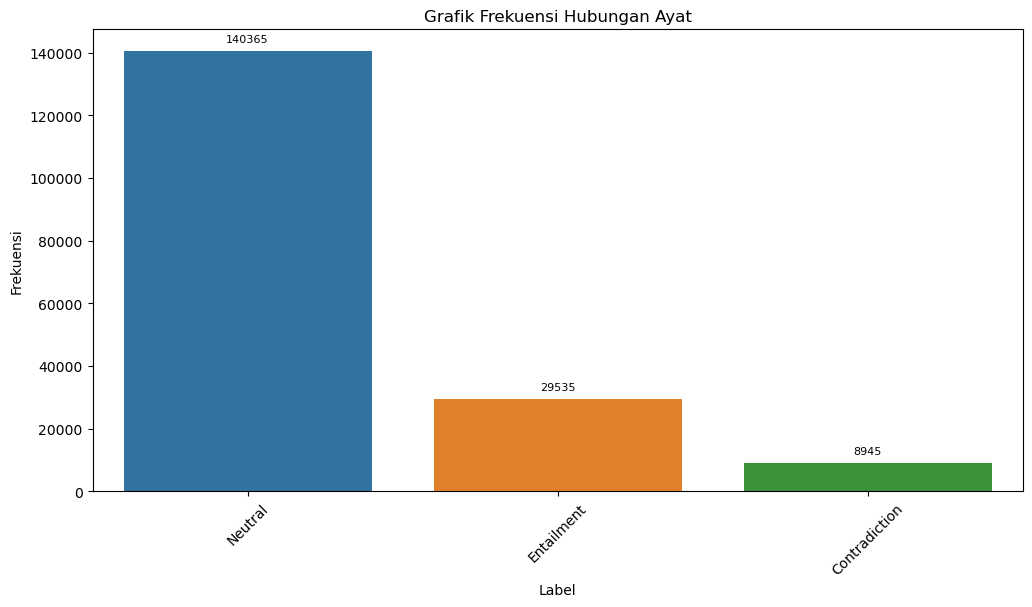

In [4]:
# Visualisasi dengan countplot menggunakan Seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_label, x='label')
plt.title('Grafik Frekuensi Hubungan Ayat')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)

# Menambahkan jumlah frekuensi di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

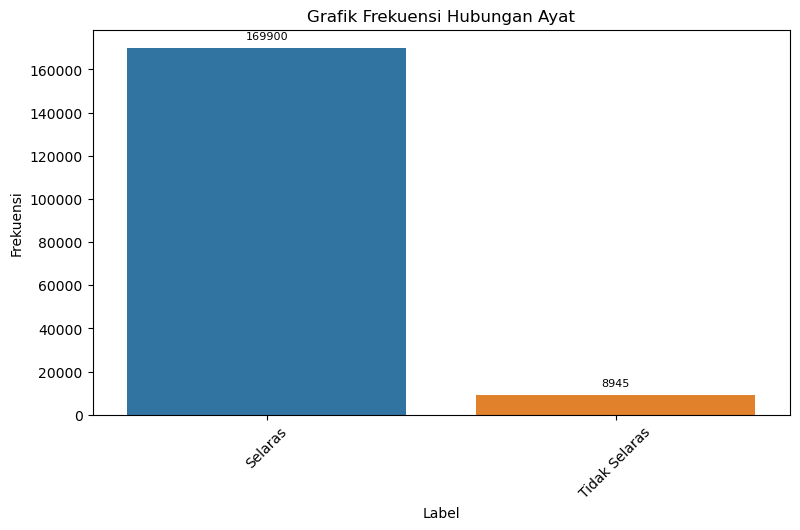

In [5]:
# Visualisasi dengan countplot menggunakan Seaborn
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df_label_2, x='label')
plt.title('Grafik Frekuensi Hubungan Ayat')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)

# Menambahkan jumlah frekuensi di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Nama Dokumen

In [6]:
# Filter dataframe
tidak_selaras_df = df_label_2[(df_label_2['label'] == 'Tidak Selaras')]
tidak_selaras_df_dokumen = tidak_selaras_df[['NAMA_DOKUMEN','NAMA_DOKUMEN_LAIN','label']]
tidak_selaras_df_dokumen.head()

,NAMA_DOKUMEN,NAMA_DOKUMEN_LAIN,label
12,Undang-Undang_No.21_Tahun_2008,1_PMK.05_2021,Tidak Selaras
36,UU411999,2022perpu002,Tidak Selaras
38,Undang-Undang_No.40_Tahun_2014,2022perpu002,Tidak Selaras
85,UU411999,UU411999,Tidak Selaras
122,Undang-Undang_No.21_Tahun_2008,2022perpu002,Tidak Selaras


##### Grafik 1

In [7]:
# Prapemrosesan untuk memastikan pasangan selalu berada dalam urutan yang sama
tidak_selaras_df_dokumen['Sorted_Docs'] = tidak_selaras_df_dokumen.apply(lambda row: sorted([row['NAMA_DOKUMEN'], row['NAMA_DOKUMEN_LAIN']]), axis=1)

# Hitung jumlah pasangan yang sama
pair_counts = tidak_selaras_df_dokumen['Sorted_Docs'].value_counts()

In [8]:
# Convert ke dataframe
pair_doc = pair_counts.to_frame().reset_index().rename(columns={'index':'Pasangan Dokumen','Sorted_Docs':'Jumlah'})
pair_doc.head()

,Pasangan Dokumen,Jumlah
0,"[2022perpu002, 2022perpu002]",2961
1,"[2022perpu002, Undang-Undang_No.40_Tahun_2014]",370
2,"[2022perpu002, UU Nomor 4 Tahun 2009]",280
3,"[2022perpu002, Undang-Undang_No.11_Tahun_2016]",207
4,"[Undang-Undang_No.24_Tahun_2004, Undang-Undang...",206


In [9]:
# Convert list to String
pair_doc['Pasangan Dokumen'] = pair_doc['Pasangan Dokumen'].apply(lambda x: "&".join(x))

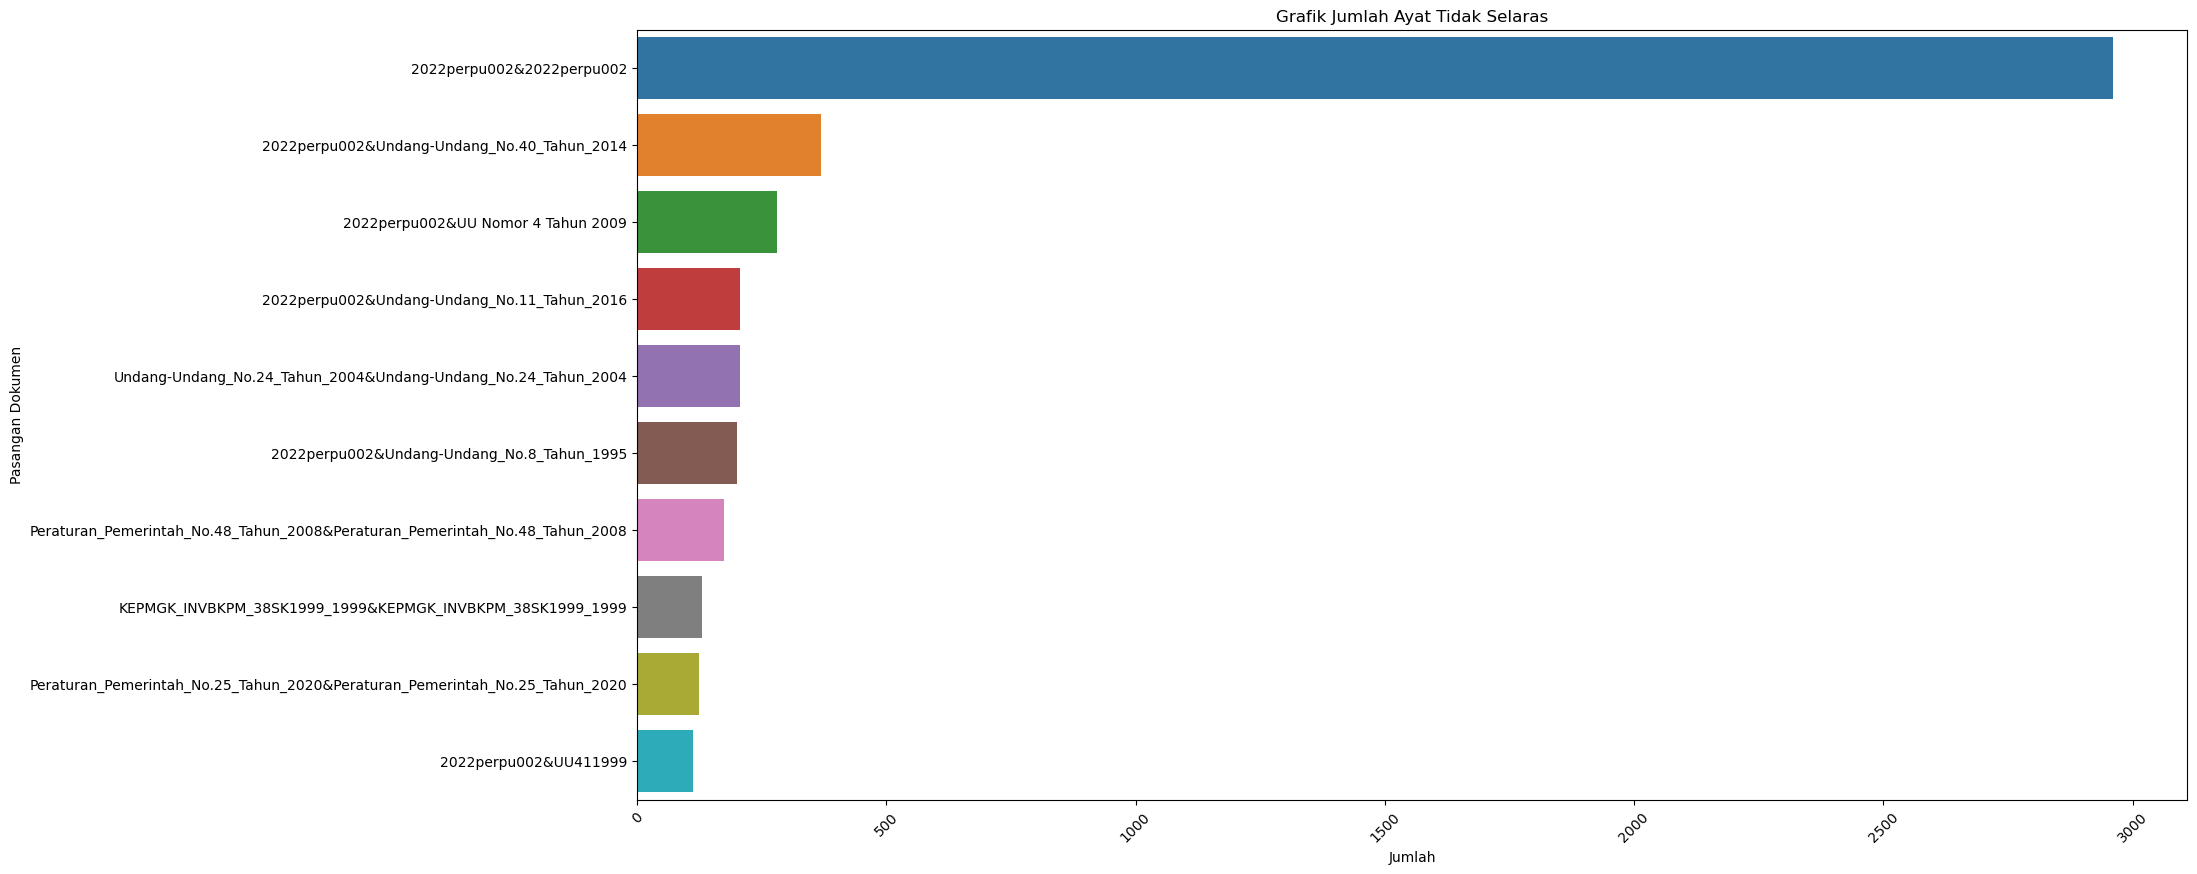

In [10]:
# Visualisasi dengan countplot menggunakan Seaborn
plt.figure(figsize=(20, 10))
data = pair_doc[pair_doc.index < 10]
ax = sns.barplot(data=data, y='Pasangan Dokumen', x='Jumlah')
plt.title('Grafik Jumlah Ayat Tidak Selaras')
plt.xlabel('Jumlah')
plt.ylabel('Pasangan Dokumen')
plt.xticks(rotation=45)


plt.show()

##### Grafik 2

In [11]:
# Drop kolom 
tidak_selaras_df_dokumen.drop(['Sorted_Docs'],axis=1,inplace=True)
tidak_selaras_df_dokumen.head()

,NAMA_DOKUMEN,NAMA_DOKUMEN_LAIN,label
12,Undang-Undang_No.21_Tahun_2008,1_PMK.05_2021,Tidak Selaras
36,UU411999,2022perpu002,Tidak Selaras
38,Undang-Undang_No.40_Tahun_2014,2022perpu002,Tidak Selaras
85,UU411999,UU411999,Tidak Selaras
122,Undang-Undang_No.21_Tahun_2008,2022perpu002,Tidak Selaras


In [12]:
# Cek apakah dokumen sama 
tidak_selaras_dokumen_2 = tidak_selaras_df_dokumen.copy()
tidak_selaras_dokumen_2['IsSameFile'] = (tidak_selaras_dokumen_2['NAMA_DOKUMEN'] == tidak_selaras_dokumen_2['NAMA_DOKUMEN_LAIN'])
tidak_selaras_dokumen_2

,NAMA_DOKUMEN,NAMA_DOKUMEN_LAIN,label,IsSameFile
12,Undang-Undang_No.21_Tahun_2008,1_PMK.05_2021,Tidak Selaras,False
36,UU411999,2022perpu002,Tidak Selaras,False
38,Undang-Undang_No.40_Tahun_2014,2022perpu002,Tidak Selaras,False
85,UU411999,UU411999,Tidak Selaras,True
122,Undang-Undang_No.21_Tahun_2008,2022perpu002,Tidak Selaras,False
...,...,...,...,...
178692,Salinan UU Nomor 9 Tahun 2020,PERMEN_KEU_53PMK052020_2020,Tidak Selaras,False
178702,2022perpu002,Peraturan_Pemerintah_No.28_Tahun_1984,Tidak Selaras,False
178767,2022perpu002,2022perpu002,Tidak Selaras,True
178799,Peraturan_Pemerintah_No.8_Tahun_2007,Peraturan Pemerintah No 1 Tahun 2008,Tidak Selaras,False


In [13]:
# Ubah kategori
tidak_selaras_dokumen_2['IsSameFile'] = tidak_selaras_dokumen_2['IsSameFile'].replace({False:'Berbeda File',True:'File yang Sama'})
tidak_selaras_dokumen_2.head()

,NAMA_DOKUMEN,NAMA_DOKUMEN_LAIN,label,IsSameFile
12,Undang-Undang_No.21_Tahun_2008,1_PMK.05_2021,Tidak Selaras,Berbeda File
36,UU411999,2022perpu002,Tidak Selaras,Berbeda File
38,Undang-Undang_No.40_Tahun_2014,2022perpu002,Tidak Selaras,Berbeda File
85,UU411999,UU411999,Tidak Selaras,File yang Sama
122,Undang-Undang_No.21_Tahun_2008,2022perpu002,Tidak Selaras,Berbeda File


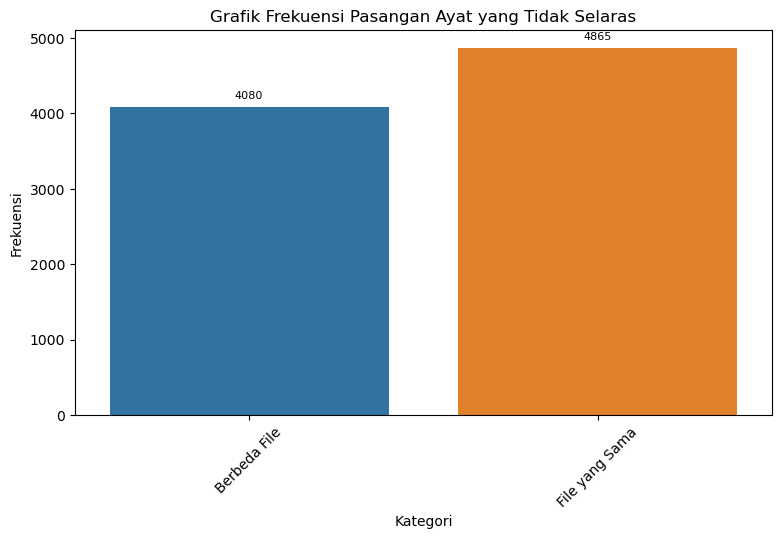

In [14]:
# Visualisasi dengan countplot menggunakan Seaborn
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=tidak_selaras_dokumen_2, x='IsSameFile')
plt.title('Grafik Frekuensi Pasangan Ayat yang Tidak Selaras')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)

# Menambahkan jumlah frekuensi di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Tahun

In [15]:
# Mapping masing-masing dokumen ke tahun pembuatan
year_mapping = {'Peraturan_Presiden_No.9_Tahun_2011':2011,'1_PMK.05_2021': 2021, '2021pp049': 2021, '2022perpu002': 2022, '2022pp031': 2022, 'INPRES Nomor 6 Tahun 2016': 2016, 'Inpres No 6 Tahun 2014': 2014, 'Inpres Nomor 2 Tahun 2021': 2021, 'Inpres_11_2011': 2011, 'KEMENKO KOOREK KEP23MEKON042008 2008': 2008, 'KEPMENKEU 511KMK062002 2002': 2002, 'KEPMEN_DAGRI_29_2002': 2002, 'KEPMEN_KEU_509KMK062002_2002': 2002, 'KEPMEN_KOOREK_KEP45MEKON082007_2007': 2007, 'KEPMGK_INVBKPM_12SK1999_1999': 1999, 'KEPMGK_INVBKPM_33SK1998_1998': 1998, 'KEPMGK_INVBKPM_38SK1999_1999': 1999, 'KEPMNG LH 9 2001': 2001, 'Keppres Nomor 11 Tahun 2021': 2021, 'Keppres Nomor 20 Tahun 2020': 2020, 'Keppres0541993': 1993, 'Keppres2951965': 1965, 'Keputusan Menteri_KP_45_Tahun_2015': 2015, 'Keputusan Presiden No 101 Tahun 1998': 1998, 'Keputusan Presiden No 117 Tahun 1999': 1999, 'Keputusan Presiden No 12 Tahun 2006': 2006, 'Keputusan Presiden No 28 Tahun 2010': 2010, 'Keputusan Presiden No 37 Tahun 1970': 1970, 'Keputusan_Presiden_No.108_Tahun_2001': 2001, 'Keputusan_Presiden_No.121_Tahun_1999': 1999, 'Keputusan_Presiden_No.176_Tahun_2000': 2000, 'Keputusan_Presiden_No.32_Tahun_2016': 2016, 'PERATURAN_PEMERINTAH_PENGGANTI_UNDANG-UNDANG_NOMOR_21_TAHUN_1960': 1960, 'PERMEN_DAGRI_52_2012': 2012, 'PERMEN_KEU_119PMK082016_2016': 2016, 'PERMEN_KEU_209PMK052015_2015': 2015, 'PERMEN_KEU_231PMK062017_2017': 2017, 'PERMEN_KEU_53PMK052020_2020': 2020, 'PERMEN_KEU_91PMK012017_2017': 2017, 'PERMEN_KOMARVES_6_2020': 2020, 'PERPRES_41_2015': 2015, 'PERPRES_NO_55_2020': 2020, 'PP_27_1985': 1985, 'PP_55_2015': 2015, 'PP_NO_24_2019': 2019, 'PP_NO_33_2013': 2013, 'PP_NO_5_2018': 2018, 'PP_NO_73_1992': 1992, 'Peraturan Menteri Keuangan Nomor 183 Tahun 2022': 2022, 'Peraturan Menteri Keuangan Republik Indonesia Nomor 103 Tahun 2019': 2019, 'Peraturan Menteri Keuangan Republik Indonesia Nomor 50 Tahun 2019': 2019, 'Peraturan Menteri Koordinator Bidang Kemaritiman dan Investasi Republik Indonesia No 1 Tahun 2022': 2022, 'Peraturan Menteri Perindustrian Republik Indonesia Nomor 64 Tahun 2016': 2016, 'Peraturan Pemerintah No 1 Tahun 2008': 2008, 'Peraturan Pemerintah No 105 Tahun 2000': 2000, 'Peraturan Pemerintah No 14 Tahun 2005': 2005, 'Peraturan Pemerintah No 28 Tahun 1996': 1996, 'Peraturan Pemerintah No 33 Tahun 1993': 1993, 'Peraturan Pemerintah No 40 Tahun 2000': 2000, 'Peraturan Pemerintah No 49 Tahun 2017': 2017, 'Peraturan Pemerintah No 54 Tahun 1993': 1993, 'Peraturan Pemerintah No 63 Tahun 2019': 2019, 'Peraturan Pemerintah No 73 Tahun 2016': 2016, 'Peraturan Pemerintah Pengganti Undang-Undang Nomor 7 Tahun 1962': 1962, 'Peraturan Pemerintah Republik Indonesia No 93 Tahun 2021': 2021, 'Peraturan Presiden No 23 Tahun 2017': 2017, 'Peraturan Presiden Nomor 63 Tahun 2021': 2021, 'Peraturan Presiden Republik Indonesia No 49 Tahun 2011': 2011, 'Peraturan_Menteri_Keuangan_nomor_218_PMK.06_2020_tahun_2020': 2020, 'Peraturan_Pemerintah_No.107_Tahun_2015': 2015, 'Peraturan_Pemerintah_No.18_Tahun_1983': 1983, 'Peraturan_Pemerintah_No.25_Tahun_2020': 2020, 'Peraturan_Pemerintah_No.28_Tahun_1984': 1984, 'Peraturan_Pemerintah_No.30_Tahun_1982': 1982, 'Peraturan_Pemerintah_No.48_Tahun_2008': 2008, 'Peraturan_Pemerintah_No.53_Tahun_2018': 2018, 'Peraturan_Pemerintah_No.75_Tahun_1992': 1992, 'Peraturan_Pemerintah_No.77_Tahun_1992': 1992, 'Peraturan_Pemerintah_No.8_Tahun_2007': 2007, 'Peraturan_Pemerintah_No.99_Tahun_2013': 2013, 'Peraturan_Pemerintah_No._45_Tahun_1995': 1995, 'Peraturan_Pemerintah_No._49_Tahun_2011': 2011, 'Peraturan_Presiden_No.10_Tahun_1964': 1964, 'Peraturan_Presiden_No.44_Tahun_2008': 2008, 'Peraturan_Presiden_No.46_Tahun_2019': 2019, 'Peraturan_Presiden_No.71_Tahun_2019': 2019, 'Peraturan_Presiden_No._27_Tahun_2009': 2009, 'Perpres Nomor 31 Tahun 2021': 2021, 'Perpres Nomor 98 Tahun 2021': 2021, 'Perpu Nomor 1 Tahun 2020': 2020, 'Salinan Perpres Nomor 71 Tahun 2019': 2019, 'Salinan UU Nomor 9 Tahun 2020': 2020, 'UU Nomor 4 Tahun 2009': 2009, 'UU411999': 1999, 'UU_34_1964': 1964, 'UU_NO_4_2016': 2016, 'Undang-Undang No 22 Tahun 2006': 2006, 'Undang-Undang_No.11_Tahun_2016': 2016, 'Undang-Undang_No.13_Tahun_1962': 1962, 'Undang-Undang_No.1_Tahun_2004': 2004, 'Undang-Undang_No.21_Tahun_2008': 2008, 'Undang-Undang_No.24_Tahun_2004': 2004, 'Undang-Undang_No.27_Tahun_2014': 2014, 'Undang-Undang_No.33_Tahun_2004': 2004, 'Undang-Undang_No.40_Tahun_2014': 2014, 'Undang-Undang_No.8_Tahun_1995': 1995, 'Undang-Undang_No.9_Tahun_2018': 2018, 'Undang-Undang_No._24_Tahun_2011': 2011, 'kp1831998': 1998, 'pmmarves002_2021': 2021}

# Buat kolom baru
df_label_2['TAHUN_DOKUMEN'] = df_label_2['NAMA_DOKUMEN'].apply(lambda x:year_mapping[x])
df_label_2['TAHUN_DOKUMEN_LAIN'] = df_label_2['NAMA_DOKUMEN_LAIN'].apply(lambda x:year_mapping[x])

df_label_2.head()

,NAMA_DOKUMEN,NO_PASAL,NO_AYAT,BUNYI_AYAT,NAMA_DOKUMEN_LAIN,NO_PASAL_LAIN,NO_AYAT_LAIN,BUNYI_AYAT_LAIN,TOPIC,label,score,TAHUN_DOKUMEN,TAHUN_DOKUMEN_LAIN
0,Undang-Undang_No.40_Tahun_2014,3,2,Perusahaan asuransi jiwa syariah hanya dapat m...,Undang-Undang_No.40_Tahun_2014,53,1,Perusahaan Asuransi dan Perusahaan Asuransi Sy...,35,Selaras,0.790448,2014,2014
1,Peraturan_Pemerintah_No.25_Tahun_2020,38,3,Ketentuan lebih lanjut mengenai persyaratan un...,Peraturan_Pemerintah_No.25_Tahun_2020,64,1,Dana Tapera yang bersumber dari dana Fasilitas...,2,Selaras,0.852398,2020,2020
2,PERMEN_DAGRI_52_2012,20,4,Penyertaan modal dan pemberian pinjaman sebaga...,Peraturan_Menteri_Keuangan_nomor_218_PMK.06_20...,23,7,Penilaian atas aspek operasional penerima inve...,24,Selaras,0.654027,2012,2020
3,Undang-Undang_No.9_Tahun_2018,19,2,Mitra Instansi Pengelola PNBP sebagaimana dima...,Undang-Undang_No.9_Tahun_2018,47,1,Terhadap Wajib Bayar yang menghitung sendiri k...,25,Selaras,0.649626,2018,2018
4,Undang-Undang_No.21_Tahun_2008,35,4,Bank Indonesia dapat menetapkan pengecualian t...,Undang-Undang_No.21_Tahun_2008,52,1,Bank Syariah dan UUS wajib menyampaikan segala...,13,Selaras,0.764714,2008,2008


In [16]:
# Filter label yang tidak selaras
tahun_df = df_label_2[df_label_2['label'] == 'Tidak Selaras'][['TAHUN_DOKUMEN','TAHUN_DOKUMEN_LAIN','label']]

# Hitung selisih tahun
tahun_df['Selisih_Tahun'] = abs(tahun_df['TAHUN_DOKUMEN'] - tahun_df['TAHUN_DOKUMEN_LAIN'])

# Sort selisih tahun dan konvert ke dataframe
selisih_tahun_df = tahun_df['Selisih_Tahun'].value_counts().sort_index()
selisih_tahun_df = selisih_tahun_df.to_frame().reset_index().rename(columns={'index':'Selisih Tahun','Selisih_Tahun':'Jumlah'})

selisih_tahun_df.head()

,Selisih Tahun,Jumlah
0,0,4975
1,1,232
2,2,357
3,3,102
4,4,250


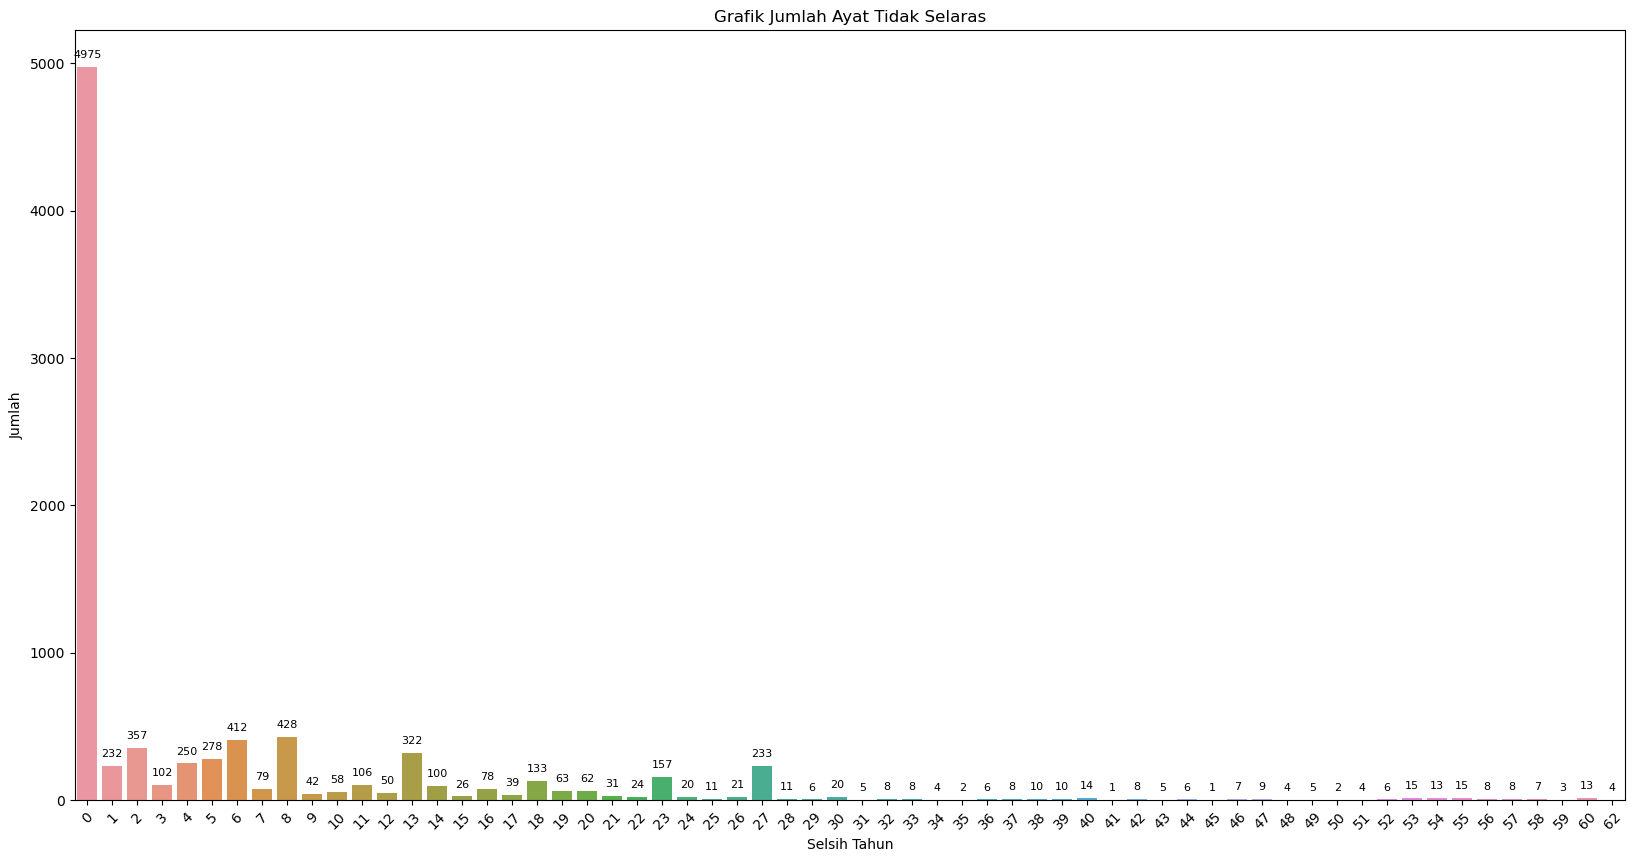

In [17]:
# Visualisasi dengan countplot menggunakan Seaborn
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=selisih_tahun_df, y='Jumlah', x='Selisih Tahun')
plt.title('Grafik Jumlah Ayat Tidak Selaras')
plt.xlabel('Selsih Tahun')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

plt.show()

### Tipe Dokumen

In [18]:
# Mapping ke tipe dokumen yang sesuai
dokumen_mapping = {'Peraturan_Presiden_No.9_Tahun_2011':'Peraturan Presiden','1_PMK.05_2021': 'Peraturan Menteri', '2021pp049': 'Peraturan Pemerintah', '2022perpu002': 'PERPU', '2022pp031': 'Peraturan Pemerintah', 'INPRES Nomor 6 Tahun 2016': 'Peraturan Presiden', 'Inpres No 6 Tahun 2014': 'Peraturan Presiden', 'Inpres Nomor 2 Tahun 2021': 'Peraturan Presiden', 'Inpres_11_2011': 'Peraturan Presiden', 'KEMENKO KOOREK KEP23MEKON042008 2008': 'Peraturan Menteri', 'KEPMENKEU 511KMK062002 2002': 'Peraturan Menteri', 'KEPMEN_DAGRI_29_2002': 'Peraturan Menteri', 'KEPMEN_KEU_509KMK062002_2002': 'Peraturan Menteri', 'KEPMEN_KOOREK_KEP45MEKON082007_2007': 'Peraturan Menteri', 'KEPMGK_INVBKPM_12SK1999_1999': 'Peraturan Menteri', 'KEPMGK_INVBKPM_33SK1998_1998': 'Peraturan Menteri', 'KEPMGK_INVBKPM_38SK1999_1999': 'Peraturan Menteri', 'KEPMNG LH 9 2001': 'Peraturan Menteri', 'Keppres Nomor 11 Tahun 2021': 'Peraturan Presiden', 'Keppres Nomor 20 Tahun 2020': 'Peraturan Presiden', 'Keppres0541993': 'Peraturan Presiden', 'Keppres2951965': 'Peraturan Presiden', 'Keputusan Menteri_KP_45_Tahun_2015': 'Peraturan Menteri', 'Keputusan Presiden No 101 Tahun 1998': 'Peraturan Presiden', 'Keputusan Presiden No 117 Tahun 1999': 'Peraturan Presiden', 'Keputusan Presiden No 12 Tahun 2006': 'Peraturan Presiden', 'Keputusan Presiden No 28 Tahun 2010': 'Peraturan Presiden', 'Keputusan Presiden No 37 Tahun 1970': 'Peraturan Presiden', 'Keputusan_Presiden_No.108_Tahun_2001': 'Peraturan Presiden', 'Keputusan_Presiden_No.121_Tahun_1999': 'Peraturan Presiden', 'Keputusan_Presiden_No.176_Tahun_2000': 'Peraturan Presiden', 'Keputusan_Presiden_No.32_Tahun_2016': 'Peraturan Presiden', 'PERATURAN_PEMERINTAH_PENGGANTI_UNDANG-UNDANG_NOMOR_21_TAHUN_1960': 'PERPU', 'PERMEN_DAGRI_52_2012': 'Peraturan Menteri', 'PERMEN_KEU_119PMK082016_2016': 'Peraturan Menteri', 'PERMEN_KEU_209PMK052015_2015': 'Peraturan Menteri', 'PERMEN_KEU_231PMK062017_2017': 'Peraturan Menteri', 'PERMEN_KEU_53PMK052020_2020': 'Peraturan Menteri', 'PERMEN_KEU_91PMK012017_2017': 'Peraturan Menteri', 'PERMEN_KOMARVES_6_2020': 'Peraturan Menteri', 'PERPRES_41_2015': 'Peraturan Presiden', 'PERPRES_NO_55_2020': 'Peraturan Presiden', 'PP_27_1985': 'Peraturan Pemerintah', 'PP_55_2015': 'Peraturan Pemerintah', 'PP_NO_24_2019': 'Peraturan Pemerintah', 'PP_NO_33_2013': 'Peraturan Pemerintah', 'PP_NO_5_2018': 'Peraturan Pemerintah', 'PP_NO_73_1992': 'Peraturan Pemerintah', 'Peraturan Menteri Keuangan Nomor 183 Tahun 2022': 'Peraturan Menteri', 'Peraturan Menteri Keuangan Republik Indonesia Nomor 103 Tahun 2019': 'Peraturan Menteri', 'Peraturan Menteri Keuangan Republik Indonesia Nomor 50 Tahun 2019': 'Peraturan Menteri', 'Peraturan Menteri Koordinator Bidang Kemaritiman dan Investasi Republik Indonesia No 1 Tahun 2022': 'Peraturan Menteri', 'Peraturan Menteri Perindustrian Republik Indonesia Nomor 64 Tahun 2016': 'Peraturan Menteri', 'Peraturan Pemerintah No 1 Tahun 2008': 'Peraturan Pemerintah', 'Peraturan Pemerintah No 105 Tahun 2000': 'Peraturan Pemerintah', 'Peraturan Pemerintah No 14 Tahun 2005': 'Peraturan Pemerintah', 'Peraturan Pemerintah No 28 Tahun 1996': 'Peraturan Pemerintah', 'Peraturan Pemerintah No 33 Tahun 1993': 'Peraturan Pemerintah', 'Peraturan Pemerintah No 40 Tahun 2000': 'Peraturan Pemerintah', 'Peraturan Pemerintah No 49 Tahun 2017': 'Peraturan Pemerintah', 'Peraturan Pemerintah No 54 Tahun 1993': 'Peraturan Pemerintah', 'Peraturan Pemerintah No 63 Tahun 2019': 'Peraturan Pemerintah', 'Peraturan Pemerintah No 73 Tahun 2016': 'Peraturan Pemerintah', 'Peraturan Pemerintah Pengganti Undang-Undang Nomor 7 Tahun 1962': 'PERPU', 'Peraturan Pemerintah Republik Indonesia No 93 Tahun 2021': 'Peraturan Pemerintah', 'Peraturan Presiden No 23 Tahun 2017': 'Peraturan Presiden', 'Peraturan Presiden Nomor 63 Tahun 2021': 'Peraturan Presiden', 'Peraturan Presiden Republik Indonesia No 49 Tahun 2011': 'Peraturan Presiden', 'Peraturan_Menteri_Keuangan_nomor_218_PMK.06_2020_tahun_2020': 'Peraturan Menteri', 'Peraturan_Pemerintah_No.107_Tahun_2015': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No.18_Tahun_1983': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No.25_Tahun_2020': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No.28_Tahun_1984': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No.30_Tahun_1982': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No.48_Tahun_2008': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No.53_Tahun_2018': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No.75_Tahun_1992': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No.77_Tahun_1992': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No.8_Tahun_2007': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No.99_Tahun_2013': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No._45_Tahun_1995': 'Peraturan Pemerintah', 'Peraturan_Pemerintah_No._49_Tahun_2011': 'Peraturan Pemerintah', 'Peraturan_Presiden_No.10_Tahun_1964': 'Peraturan Presiden', 'Peraturan_Presiden_No.44_Tahun_2008': 'Peraturan Presiden', 'Peraturan_Presiden_No.46_Tahun_2019': 'Peraturan Presiden', 'Peraturan_Presiden_No.71_Tahun_2019': 'Peraturan Presiden', 'Peraturan_Presiden_No._27_Tahun_2009': 'Peraturan Presiden', 'Perpres Nomor 31 Tahun 2021': 'Peraturan Presiden', 'Perpres Nomor 98 Tahun 2021': 'Peraturan Presiden', 'Perpu Nomor 1 Tahun 2020': 'PERPU', 'Salinan Perpres Nomor 71 Tahun 2019': 'Peraturan Presiden', 'Salinan UU Nomor 9 Tahun 2020': 'Undang-Undang', 'UU Nomor 4 Tahun 2009': 'Undang-Undang', 'UU411999': 'Undang-Undang', 'UU_34_1964': 'Undang-Undang', 'UU_NO_4_2016': 'Undang-Undang', 'Undang-Undang No 22 Tahun 2006': 'Undang-Undang', 'Undang-Undang_No.11_Tahun_2016': 'Undang-Undang', 'Undang-Undang_No.13_Tahun_1962': 'Undang-Undang', 'Undang-Undang_No.1_Tahun_2004': 'Undang-Undang', 'Undang-Undang_No.21_Tahun_2008': 'Undang-Undang', 'Undang-Undang_No.24_Tahun_2004': 'Undang-Undang', 'Undang-Undang_No.27_Tahun_2014': 'Undang-Undang', 'Undang-Undang_No.33_Tahun_2004': 'Undang-Undang', 'Undang-Undang_No.40_Tahun_2014': 'Undang-Undang', 'Undang-Undang_No.8_Tahun_1995': 'Undang-Undang', 'Undang-Undang_No.9_Tahun_2018': 'Undang-Undang', 'Undang-Undang_No._24_Tahun_2011': 'Undang-Undang', 'kp1831998': 'Peraturan Presiden', 'pmmarves002_2021': 'Peraturan Menteri'}

# Buat kolom baru
df_label_2['JENIS_PERATURAN'] = df_label_2['NAMA_DOKUMEN'].apply(lambda x:dokumen_mapping[x])
df_label_2['JENIS_PERATURAN_LAIN'] = df_label_2['NAMA_DOKUMEN_LAIN'].apply(lambda x:dokumen_mapping[x])

df_label_2.head()

,NAMA_DOKUMEN,NO_PASAL,NO_AYAT,BUNYI_AYAT,NAMA_DOKUMEN_LAIN,NO_PASAL_LAIN,NO_AYAT_LAIN,BUNYI_AYAT_LAIN,TOPIC,label,score,TAHUN_DOKUMEN,TAHUN_DOKUMEN_LAIN,JENIS_PERATURAN,JENIS_PERATURAN_LAIN
0,Undang-Undang_No.40_Tahun_2014,3,2,Perusahaan asuransi jiwa syariah hanya dapat m...,Undang-Undang_No.40_Tahun_2014,53,1,Perusahaan Asuransi dan Perusahaan Asuransi Sy...,35,Selaras,0.790448,2014,2014,Undang-Undang,Undang-Undang
1,Peraturan_Pemerintah_No.25_Tahun_2020,38,3,Ketentuan lebih lanjut mengenai persyaratan un...,Peraturan_Pemerintah_No.25_Tahun_2020,64,1,Dana Tapera yang bersumber dari dana Fasilitas...,2,Selaras,0.852398,2020,2020,Peraturan Pemerintah,Peraturan Pemerintah
2,PERMEN_DAGRI_52_2012,20,4,Penyertaan modal dan pemberian pinjaman sebaga...,Peraturan_Menteri_Keuangan_nomor_218_PMK.06_20...,23,7,Penilaian atas aspek operasional penerima inve...,24,Selaras,0.654027,2012,2020,Peraturan Menteri,Peraturan Menteri
3,Undang-Undang_No.9_Tahun_2018,19,2,Mitra Instansi Pengelola PNBP sebagaimana dima...,Undang-Undang_No.9_Tahun_2018,47,1,Terhadap Wajib Bayar yang menghitung sendiri k...,25,Selaras,0.649626,2018,2018,Undang-Undang,Undang-Undang
4,Undang-Undang_No.21_Tahun_2008,35,4,Bank Indonesia dapat menetapkan pengecualian t...,Undang-Undang_No.21_Tahun_2008,52,1,Bank Syariah dan UUS wajib menyampaikan segala...,13,Selaras,0.764714,2008,2008,Undang-Undang,Undang-Undang


In [19]:
# Filter label yang tidak selaras
jenis_df = df_label_2[df_label_2['label'] == 'Tidak Selaras'][['JENIS_PERATURAN','JENIS_PERATURAN_LAIN','label']]

jenis_df.head()

,JENIS_PERATURAN,JENIS_PERATURAN_LAIN,label
12,Undang-Undang,Peraturan Menteri,Tidak Selaras
36,Undang-Undang,PERPU,Tidak Selaras
38,Undang-Undang,PERPU,Tidak Selaras
85,Undang-Undang,Undang-Undang,Tidak Selaras
122,Undang-Undang,PERPU,Tidak Selaras


In [20]:
# Sort urutan JENIS_PERATURAN dan JENIS_PERATURAN_LAIN
jenis_df['Sorted_Jenis'] = jenis_df.apply(lambda row: sorted([row['JENIS_PERATURAN'], row['JENIS_PERATURAN_LAIN']]), axis=1)
jenis_df = jenis_df[['Sorted_Jenis']]
jenis_df = pd.DataFrame(jenis_df['Sorted_Jenis'].to_list(), columns = ['JENIS_PERATURAN','JENIS_PERATURAN_LAIN'])

In [21]:
# Hitung frekuensi pasangan nilai 'JENIS_PERATURAN' dan 'JENIS_PERATURAN_LAIN'
value_counts = jenis_df.groupby(['JENIS_PERATURAN', 'JENIS_PERATURAN_LAIN']).size().reset_index(name='count')
value_counts

,JENIS_PERATURAN,JENIS_PERATURAN_LAIN,count
0,PERPU,PERPU,3038
1,PERPU,Peraturan Menteri,140
2,PERPU,Peraturan Pemerintah,324
3,PERPU,Peraturan Presiden,27
4,PERPU,Undang-Undang,1420
5,Peraturan Menteri,Peraturan Menteri,449
6,Peraturan Menteri,Peraturan Pemerintah,263
7,Peraturan Menteri,Peraturan Presiden,45
8,Peraturan Menteri,Undang-Undang,209
9,Peraturan Pemerintah,Peraturan Pemerintah,820


<Figure size 1200x600 with 0 Axes>

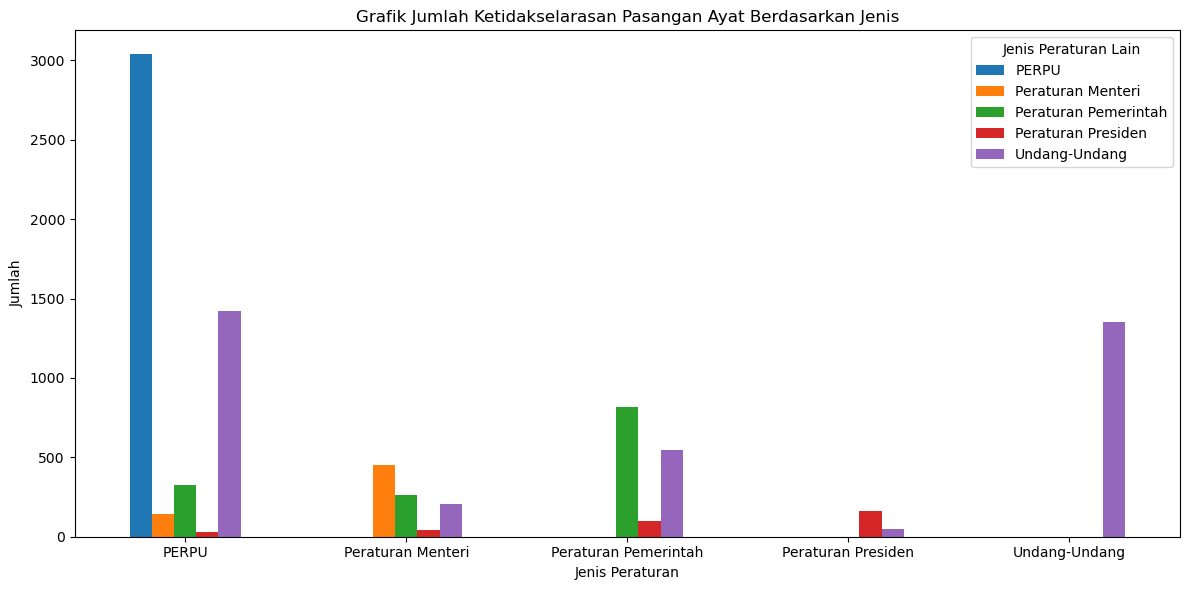

In [22]:
# Pivot the data to create a stacked bar chart
pivot_df = value_counts.pivot(index='JENIS_PERATURAN', columns='JENIS_PERATURAN_LAIN', values='count').fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=False,figsize=(12, 6))
plt.xlabel('Jenis Peraturan')
plt.ylabel('Jumlah')
plt.title('Grafik Jumlah Ketidakselarasan Pasangan Ayat Berdasarkan Jenis')
plt.xticks(rotation=0)
plt.legend(title='Jenis Peraturan Lain')
plt.tight_layout()
plt.show()

### Topic

In [23]:
topic_df = df_label_2[df_label_2['label'] == 'Tidak Selaras'][['TOPIC']]
topic_df = topic_df.value_counts().to_frame().reset_index().rename(columns = {0:'Jumlah'})
topic_df.head(10)

,TOPIC,Jumlah
0,0,3536
1,8,701
2,6,312
3,18,279
4,2,208
5,10,207
6,20,198
7,11,176
8,22,165
9,27,161


In [24]:
# Jumlahkan data pada index 10 ke bawah
sum_others = topic_df.iloc[10:]['Jumlah'].sum()

# Ubah data pada index 10 ke bawah menjadi 'Topik lain' dan data jumlahnya menjadi sum_others
topic_df.loc[10:] = ['Topik lain', sum_others]

In [25]:
topic_df = topic_df.loc[:10]

In [26]:
topic_df['TOPIC'] = topic_df['TOPIC'].apply(lambda x:f"Topik-{x}")
topic_df

,TOPIC,Jumlah
0,Topik-0,3536
1,Topik-8,701
2,Topik-6,312
3,Topik-18,279
4,Topik-2,208
5,Topik-10,207
6,Topik-20,198
7,Topik-11,176
8,Topik-22,165
9,Topik-27,161


In [27]:
topic_df.loc[10,'TOPIC'] = 'Topik Lain'

In [28]:
topic_df

,TOPIC,Jumlah
0,Topik-0,3536
1,Topik-8,701
2,Topik-6,312
3,Topik-18,279
4,Topik-2,208
5,Topik-10,207
6,Topik-20,198
7,Topik-11,176
8,Topik-22,165
9,Topik-27,161


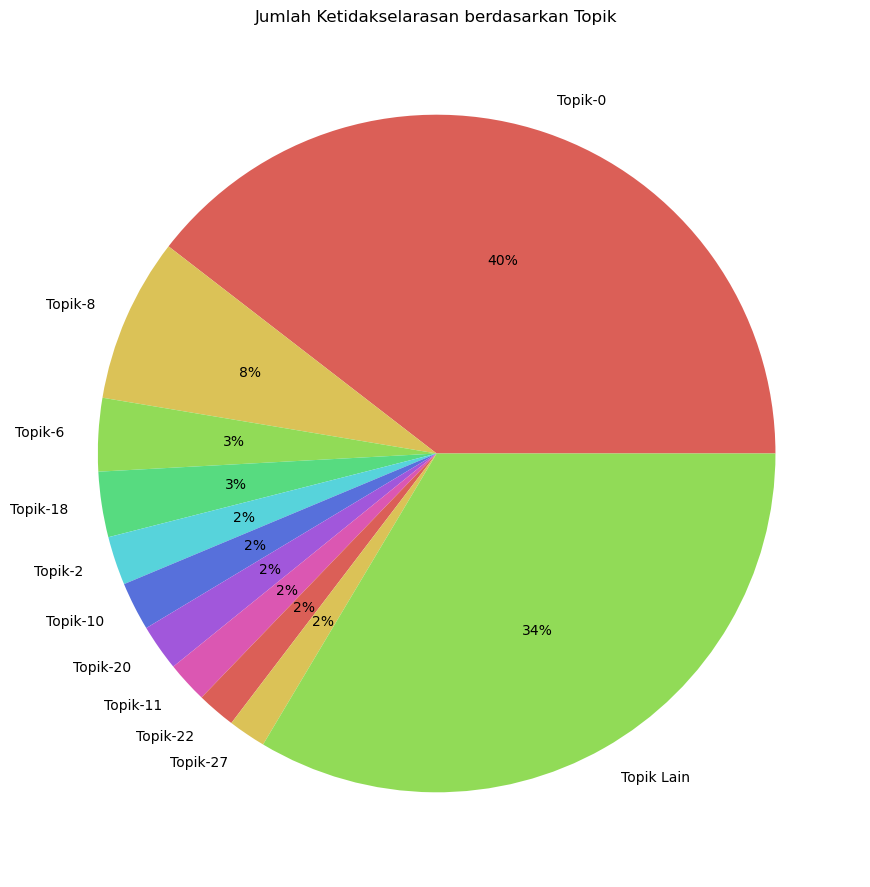

In [29]:
# Plot the stacked bar chart
plt.figure(figsize=(20, 11))

# define Seaborn color palette to use
palette_color = sns.color_palette('hls',8)
  
# plotting data on chart
plt.pie(topic_df['Jumlah'], labels=topic_df['TOPIC'], colors=palette_color, autopct='%.0f%%')
plt.title('Jumlah Ketidakselarasan berdasarkan Topik')  
# displaying chart
plt.show()